In [1]:
#!/usr/bin/env python
# # -*- coding: utf-8 -*-
#!/usr/bin/env python
#!pip install tensorflow==1.15

import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob, os, inspect
import argparse
import time
import seaborn as sns
# import matplotlib
# matplotlib.use("Qt5Agg")
# #matplotlib.use('Agg')
# from mpl_toolkits.mplot3d import axes3d
# import matplotlib.pyplot as plt
import pandas as pd
import sys,inspect
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Postprocess")
sys.path.append("C:\\Users\\Vinamr J\\Documents\\qic\\qrc\\hqr\\hqr-master\\chaos\\Methods\\Models\\Utils")

import utils  # for utils.py
from utils import *
import global_utils  # for global_utils.py

# import utils
# from utils import *
# import sys
# sys.path.append('../Methods/Models/Utils')
# import global_utils

In [2]:
sysname, tidx = "SST", 2
file_path = os.path.abspath("HQRC_analysis.ipynb")
current_directory = os.path.dirname(file_path)
mid_directory = os.path.dirname(current_directory)
parent_directory = os.path.dirname(mid_directory)

print("Current Directory:", current_directory)
print("Parent Directory:", parent_directory)

#current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
results_dir = os.path.join(os.path.dirname(mid_directory), "Results")  # Use os.path.join for path concatenation
print(results_dir)

eval_path = os.path.join(results_dir, sysname, 'Evaluation_Data')
print(eval_path)

model_path = os.path.join(results_dir, sysname, 'Trained_Models')
print(model_path)

fig_path = os.path.join(results_dir, sysname, 'Eval_Figures')
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)  # Use os.makedirs to create parent directories if needed
print(fig_path)

Current Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Data\SST
Parent Directory: c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Evaluation_Data
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Trained_Models
c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\Results\SST\Eval_Figures


In [3]:
models = []
samples = []
size_values = [80,120,250,500,1000,2000]
layer_values = [1,2]
hspl_values = [50,60,70]
sl_values = [16,20]
for size in size_values:
    for layers in layer_values:
        for hspl in hspl_values:
            for sl in sl_values:
                string1 = f"RNN-gru-RDIM_5-N_used_427-NLAY_{layers}-SLAY_{size}-ISH_statefull-SL_{sl}-PL_{sl}-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_{hspl}-IPL_300-NL_0-NICS_3"
                string2 = f"GRU-{size}-({layers})-HSPL-{hspl}-SL-{sl}"
                models.append([os.path.join(eval_path,string1),string2])
                samples.append(string2)
title = "Sea Surface Temperatures"

In [ ]:
# models = [[os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_20-IUL_0-REG_1e-07-AU_0-NICS_3"),"HQR-5,V-10,DL=40,IPL=20,n_tests=3"],
#           [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_8-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_8-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=8,IPL=8,n_tests=1"],
#           [os.path.join(eval_path, "hqrc_pinv-RDIM_5-N_used_427-DL_40-Nqr_5-A_0.9-J_2.0-fJ_1-V_10-NL_0-IPL_300-IUL_0-REG_1e-07-AU_0-NICS_1"),"HQR-5,V-10,DL=40,IPL=300,n_tests=1"]]
# samples = ["HQR-5,V-10,DL=40,IPL=20,n_tests=3","HQR-5,V-10,DL=8,IPL=8,n_tests=1","HQR-5,V-10,DL=40,IPL=300,n_tests=1"]
# title = "Sea Surface Temperatures"

In [4]:
rmse_dict = dict()
targets = dict()
outputs = dict()
targets_train = dict()
outputs_train = dict()
sp_outputs = dict()
sp_targets = dict()
Wouts = dict()
coeffs = dict()
rmnse_avg_train_dict = dict()
rmnse_avg_test_dict = dict()
for i in range(len(models)):
    rfolder, label = models[i][0], models[i][1]
    fname = os.path.join(rfolder, 'results.pickle')
    if os.path.isfile(fname):
        with open(fname, 'rb') as rfile:
            try:
                rs = pickle.load(rfile)
            except:
                continue
            #print(rs.keys())
            qs = QResults()
            qs.rmnse_avg_test = rs['rmnse_avg_TEST']
            qs.rmnse_avg_train = rs['rmnse_avg_TRAIN']
            qs.n_pred_005_avg_test = rs['num_accurate_pred_005_avg_TEST']
            qs.n_pred_005_avg_train = rs['num_accurate_pred_005_avg_TRAIN']
            qs.n_pred_050_avg_test = rs['num_accurate_pred_050_avg_TEST']
            qs.n_pred_050_avg_train = rs['num_accurate_pred_050_avg_TRAIN']
            qs.model_name = rs['model_name']
            #if qs.rmnse_avg_test != np.inf and qs.rmnse_avg_train != np.inf:
                #print(rs.keys())
            #print(qs.model_name)
            #print('train={}, test={}'.format(qs.rmnse_avg_train, qs.rmnse_avg_test))
            #qs.info()
            rmnse_avg_train_dict[label] = rs['rmnse_avg_TRAIN']
            rmnse_avg_test_dict[label] = rs['rmnse_avg_TEST']
            pred_test = rs['predictions_all_TEST']
            truth_test = rs['truths_all_TEST']
            pred_train = rs['predictions_all_TRAIN']
            truth_train =rs['truths_all_TRAIN']
            print(pred_test.shape)
            M = len(pred_test)
            print('{} Number of test'.format(qs.model_name), M)
            rmsels = []
            for j in range(M):
                    rmsels.append(calNRMSE(pred_test[j], truth_test[j]))

            rmse_dict[label] = np.mean(np.array(rmsels), axis=0)
            print(rmse_dict[label].shape)


            targets[label] = truth_test[0] #0th test 
            outputs[label] = pred_test[0]

            targets_train[label] = truth_train[0] #0th test 
            outputs_train[label] = pred_train[0]
            # For frequency
            sp_outputs[label] = rs['sp_pred_TEST']
            sp_targets[label] = rs['sp_true_TEST']
    else:
        print('Not found {}'.format(fname))
    # if trained_models is not None:
    #     rfolder, label = trained_models[i][0], trained_models[i][1]
    #     fname = os.path.join(rfolder, 'data.pickle')
    #     if os.path.isfile(fname):
    #         print('File existed: ', fname)
    #         with open(fname, 'rb') as rfile:
    #             #try:
    #             rs = pickle.load(rfile)
    #             #except:
    #             #    continue
    #             print(rs.keys())
    #             coeffs[label] = np.array(rs['coeffs'])
    #             Wouts[label]  = rs['W_out'][:-1].reshape((coeffs[label].shape[0], -1))
    #             print(Wouts[label].shape, coeffs[label].shape)
    #     else:
    #         print('Not found saved model {}'.format(fname))

(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_16-PL_16-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_50-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_20-PL_20-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_50-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_16-PL_16-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_60-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_20-PL_20-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_60-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_16-PL_16-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_70-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_1-SLAY_80-ISH_statefull-SL_20-PL_20-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_70-IPL_300-NL_0-NICS_3 Number of test 3
(300,)
(3, 300, 5)
RNN-gru-RDIM_5-N_used_427-NLAY_2-SLAY_80-ISH_statefu

In [5]:
#Manually calculated ignore
model_test_error = []
test_avg_error = []
for label in samples:
    model_test_error.append([label,np.mean(rmse_dict[label])])
    test_avg_error.append(np.mean(rmse_dict[label]))
print(model_test_error)
print("Test Average error = ",np.mean(test_avg_error))

[['GRU-80-(1)-HSPL-50-SL-16', 1.4534400503342892], ['GRU-80-(1)-HSPL-50-SL-20', 1.6595681962600373], ['GRU-80-(1)-HSPL-60-SL-16', 1.6475154508028302], ['GRU-80-(1)-HSPL-60-SL-20', 1.4074525837745722], ['GRU-80-(1)-HSPL-70-SL-16', 1.6854053980356805], ['GRU-80-(1)-HSPL-70-SL-20', 1.5224478247904185], ['GRU-80-(2)-HSPL-50-SL-16', 1.6033143328636672], ['GRU-80-(2)-HSPL-50-SL-20', 1.6140199306783183], ['GRU-80-(2)-HSPL-60-SL-16', 1.3954481651048505], ['GRU-80-(2)-HSPL-60-SL-20', 1.748520304257898], ['GRU-80-(2)-HSPL-70-SL-16', 1.27287131157112], ['GRU-80-(2)-HSPL-70-SL-20', 1.3529304509999804], ['GRU-120-(1)-HSPL-50-SL-16', 1.2979204895525838], ['GRU-120-(1)-HSPL-50-SL-20', 1.600815783857405], ['GRU-120-(1)-HSPL-60-SL-16', 1.3293999134611254], ['GRU-120-(1)-HSPL-60-SL-20', 1.491129235253141], ['GRU-120-(1)-HSPL-70-SL-16', 1.4299862154892602], ['GRU-120-(1)-HSPL-70-SL-20', 1.2568802367334428], ['GRU-120-(2)-HSPL-50-SL-16', 1.3561822510886137], ['GRU-120-(2)-HSPL-50-SL-20', 1.487062074384425

In [6]:
print(rmnse_avg_train_dict)
print(rmnse_avg_test_dict)
error_array_test = []
error_array_train = []
for label in samples:
    error_array_train.append(rmnse_avg_train_dict[label])
    error_array_test.append(rmnse_avg_test_dict[label])
print("Train average error for HQRC =", np.mean(error_array_train))
print("Test average error for HQRC =", np.mean(error_array_test))

{'GRU-80-(1)-HSPL-50-SL-16': 0.6924802875735595, 'GRU-80-(1)-HSPL-50-SL-20': 0.9639648362379107, 'GRU-80-(1)-HSPL-60-SL-16': 1.1238542724314524, 'GRU-80-(1)-HSPL-60-SL-20': 0.31624164975676144, 'GRU-80-(1)-HSPL-70-SL-16': 0.30237802467328545, 'GRU-80-(1)-HSPL-70-SL-20': 0.83980092468717, 'GRU-80-(2)-HSPL-50-SL-16': 0.6888986353726597, 'GRU-80-(2)-HSPL-50-SL-20': 1.1130798279871852, 'GRU-80-(2)-HSPL-60-SL-16': 0.6265303692228339, 'GRU-80-(2)-HSPL-60-SL-20': 1.3750863097666797, 'GRU-80-(2)-HSPL-70-SL-16': 0.40245925076083117, 'GRU-80-(2)-HSPL-70-SL-20': 0.8121058966584982, 'GRU-120-(1)-HSPL-50-SL-16': 0.5447772624334491, 'GRU-120-(1)-HSPL-50-SL-20': 0.356789936804034, 'GRU-120-(1)-HSPL-60-SL-16': 0.39528182921122007, 'GRU-120-(1)-HSPL-60-SL-20': 0.7694518845720543, 'GRU-120-(1)-HSPL-70-SL-16': 0.340919163084387, 'GRU-120-(1)-HSPL-70-SL-20': 0.8943052018945103, 'GRU-120-(2)-HSPL-50-SL-16': 0.5573179480264256, 'GRU-120-(2)-HSPL-50-SL-20': 0.40350645145264846, 'GRU-120-(2)-HSPL-60-SL-16': 0

In [7]:
#Sort the dictionary by its values
sorted_rmnse_train = sorted(rmnse_avg_train_dict.items(), key=lambda item: item[1])

#Extract the top 5 keys with the lowest values
#top_5_models_train = [key for key, value in sorted_rmnse_train[:5]]
top_5_models_train = dict(sorted_rmnse_train[:5])
print("Top 5 models with the lowest RMNSE values for training data:", top_5_models_train)

Top 5 models with the lowest RMNSE values for training data: {'GRU-250-(2)-HSPL-70-SL-16': 0.273523846314144, 'GRU-80-(1)-HSPL-70-SL-16': 0.30237802467328545, 'GRU-80-(1)-HSPL-60-SL-20': 0.31624164975676144, 'GRU-120-(2)-HSPL-70-SL-16': 0.3272169789959945, 'GRU-120-(1)-HSPL-70-SL-16': 0.340919163084387}


In [8]:
# Step 1: Sort the dictionary by its values
sorted_rmnse_test = sorted(rmnse_avg_test_dict.items(), key=lambda item: item[1])

# Step 2: Extract the top 5 keys with the lowest values
#top_5_models_train = [key for key, value in sorted_rmnse_train[:5]]
top_5_models_test = dict(sorted_rmnse_test[:5])
print("Top 5 models with the lowest RMNSE values for test data:", top_5_models_test)

Top 5 models with the lowest RMNSE values for test data: {'GRU-500-(2)-HSPL-60-SL-16': 0.8564079629270196, 'GRU-2000-(2)-HSPL-70-SL-16': 0.8690036069219274, 'GRU-2000-(2)-HSPL-60-SL-20': 0.8942511902302547, 'GRU-250-(1)-HSPL-50-SL-16': 0.9523991512876374, 'GRU-250-(1)-HSPL-50-SL-20': 0.9745158026994624}


In [9]:
predictions = []
truths = []
for keys in top_5_models_train:
    predictions.append(outputs_train[keys])
    truths.append(targets_train[keys])
mean_train_predictions = np.mean(predictions, axis=0)
std_train_predictions = np.std(predictions, axis=0)
print("Mean predictions shape:", mean_train_predictions.shape)
print("Standard deviation shape:", std_train_predictions.shape)
print("Mean predictions:\n", mean_train_predictions)
print("Standard deviation:\n", std_train_predictions)
mean_train_truths = np.mean(truths, axis=0)
std_train_truths = np.std(truths, axis=0)
# print("Mean predictions shape:", mean_truths.shape)
# print("Standard deviation shape:", std_truths.shape)
# print("Mean predictions:\n", mean_truths)
# print("Standard deviation:\n", std_truths)

Mean predictions shape: (300, 5)
Standard deviation shape: (300, 5)
Mean predictions:
 [[-386.84484506  -58.9950795    76.09294583    7.04853214   19.65129648]
 [-416.48623584  -51.82067663   88.23664703    8.19830168   15.66551362]
 [-440.49603827  -43.99990781   96.14309985    9.08902682   11.52025051]
 ...
 [ 310.77718548  -88.05786946  -18.91817119   -4.32013434  -19.26849682]
 [ 259.53263561  -92.93916243  -35.26194158   -6.99200035  -18.48029023]
 [ 205.22760191  -97.25441721  -49.10780864  -10.20277892  -17.45721644]]
Standard deviation:
 [[  4.75284494   1.86751442   0.20650231   0.94764984   1.33342671]
 [  3.10953814   1.96951995   0.91059122   0.77563909   1.64817284]
 [  3.14137395   2.15544129   1.3390678    0.65839187   1.94318793]
 ...
 [153.26638703  17.52084496  37.84534508  15.33753676  17.24566989]
 [160.36384384  15.12601899  30.18193774  15.85932865  17.81697825]
 [164.95915567  12.61863371  26.61141946  15.98797528  18.18658775]]


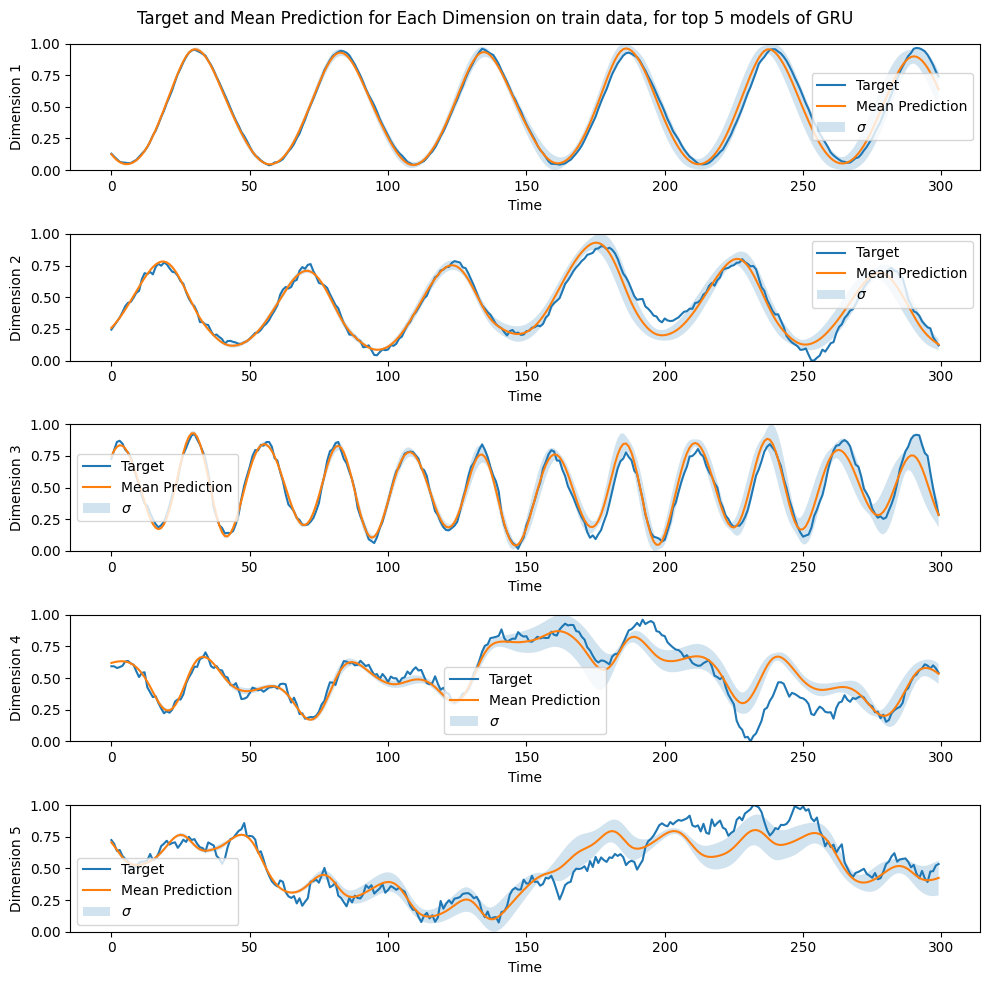

In [13]:
num_dimensions = mean_train_truths.shape[1]
# Create subplots
fig, axs = plt.subplots(num_dimensions, 1, figsize=(10, 10))

# Iterate over each dimension
for dim in range(num_dimensions):
    # Extract arrays for the current dimension
    target_dim = mean_train_truths[:, dim]
    out_dim = mean_train_predictions[:, dim]
    std_dim = std_train_predictions[:, dim]

    # Calculate min and max values across all arrays for current dimension
    data_min = min(np.min(target_dim), np.min(out_dim - std_dim))
    data_max = max(np.max(target_dim), np.max(out_dim + std_dim))

    # Normalize arrays to [0, 1] range
    target_dim = (target_dim - data_min) / (data_max - data_min)
    out_dim = (out_dim - data_min) / (data_max - data_min)
    std_dim = std_dim / (data_max - data_min)  # std deviation is normalized accordingly

    # Plot target and output arrays
    axs[dim].plot(target_dim, label='Target')
    axs[dim].plot(out_dim, label='Mean Prediction')
    axs[dim].fill_between(range(len(out_dim)), out_dim - std_dim, out_dim + std_dim, alpha=0.2, label=r'$\sigma$')

    # Set y-axis limits to [0, 1]
    axs[dim].set_ylim(0, 1)

    # Add labels and legend
    axs[dim].set_xlabel('Time')
    axs[dim].set_ylabel(f'Dimension {dim + 1}')
    axs[dim].legend()

# Add title
plt.suptitle('Target and Mean Prediction for Each Dimension on train data, for top 5 models of GRU')
# Adjust layout
plt.tight_layout()

# Plot frequency
plt.show()

In [14]:
predictions = []
truths = []
for keys in top_5_models_train:
    predictions.append(outputs[keys])
    truths.append(targets[keys])
mean_test_predictions = np.mean(predictions, axis=0)
std_test_predictions = np.std(predictions, axis=0)
print("Mean predictions shape:", mean_test_predictions.shape)
print("Standard deviation shape:", std_test_predictions.shape)
print("Mean predictions:\n", mean_test_predictions)
print("Standard deviation:\n", std_test_predictions)
mean_test_truths = np.mean(truths, axis=0)
std_test_truths = np.std(truths, axis=0)
# print("Mean predictions shape:", mean_truths.shape)
# print("Standard deviation shape:", std_truths.shape)
# print("Mean predictions:\n", mean_truths)
# print("Standard deviation:\n", std_truths)

Mean predictions shape: (300, 5)
Standard deviation shape: (300, 5)
Mean predictions:
 [[ 483.36981658  -40.01412252   66.64238102  -41.13119642   33.50650714]
 [ 477.71632478  -47.48420873   58.31399607  -41.08190824   32.48281722]
 [ 463.00292209  -55.14712423   48.41829638  -41.54175346   31.5566446 ]
 ...
 [-275.11085536   19.68335213    6.01062549  -20.44287407  -30.59204788]
 [-254.48585505   26.87017324   -5.27043149  -22.65520921  -31.30724292]
 [-229.80795202   33.71275593  -16.20568246  -25.35049295  -31.69578396]]
Standard deviation:
 [[ 76.92746906  15.44084128   9.12213418   5.57678653   4.26997742]
 [ 74.71882126  14.26069987   9.05256441   5.97085494   4.27252222]
 [ 76.91410882  13.98383806   9.25987148   6.83287405   4.36877597]
 ...
 [179.40209395  33.81031269  37.43340984  36.11159381  25.39203244]
 [178.37607343  32.86739973  35.80907867  38.34033761  23.95550549]
 [175.36450835  32.11193932  34.23421794  40.84813814  22.67522899]]


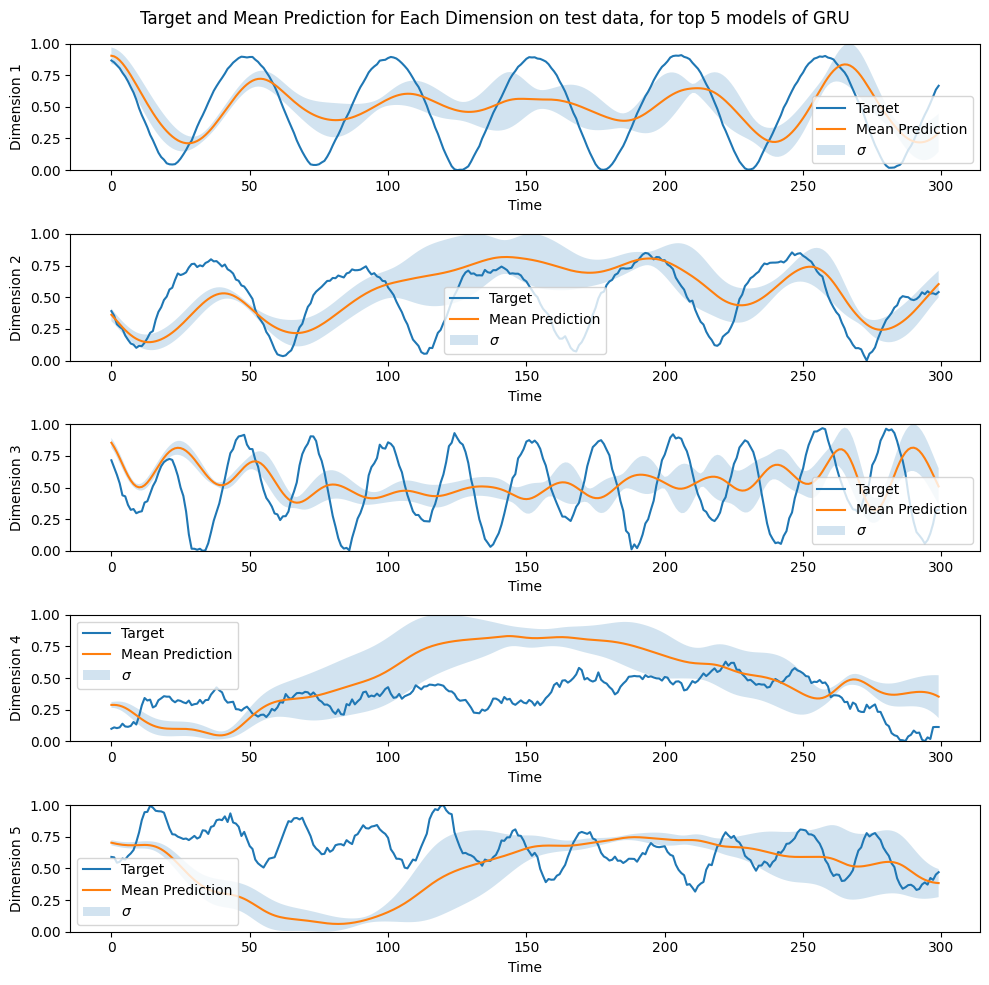

In [15]:
num_dimensions = mean_test_truths.shape[1]
# Create subplots
fig, axs = plt.subplots(num_dimensions, 1, figsize=(10, 10))

# Iterate over each dimension
for dim in range(num_dimensions):
    # Extract arrays for the current dimension
    target_dim = mean_test_truths[:, dim]
    out_dim = mean_test_predictions[:, dim]
    std_dim = std_test_predictions[:, dim]

    # Calculate min and max values across all arrays for current dimension
    data_min = min(np.min(target_dim), np.min(out_dim - std_dim))
    data_max = max(np.max(target_dim), np.max(out_dim + std_dim))

    # Normalize arrays to [0, 1] range
    target_dim = (target_dim - data_min) / (data_max - data_min)
    out_dim = (out_dim - data_min) / (data_max - data_min)
    std_dim = std_dim / (data_max - data_min)  # std deviation is normalized accordingly

    # Plot target and output arrays
    axs[dim].plot(target_dim, label='Target')
    axs[dim].plot(out_dim, label='Mean Prediction')
    axs[dim].fill_between(range(len(out_dim)), out_dim - std_dim, out_dim + std_dim, alpha=0.2, label=r'$\sigma$')

    # Set y-axis limits to [0, 1]
    axs[dim].set_ylim(0, 1)

    # Add labels and legend
    axs[dim].set_xlabel('Time')
    axs[dim].set_ylabel(f'Dimension {dim + 1}')
    axs[dim].legend()

# Add title
plt.suptitle('Target and Mean Prediction for Each Dimension on test data, for top 5 models of GRU')
# Adjust layout
plt.tight_layout()

# Plot frequency
plt.show()

## Reconstruction of Temperature map along and error analysis

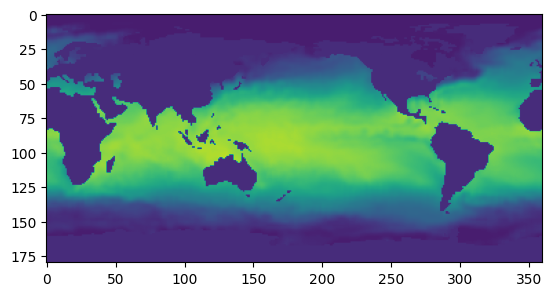

In [16]:
train_data = np.load('Data/sst_var_train',allow_pickle=True).data
test_data = np.load('Data/sst_var_test',allow_pickle=True).data
mask = np.load('Data/mask',allow_pickle=True)
#plt.imshow(train_data[0]*mask[0],vmin=-5,vmax=35)
plt.imshow(test_data[0]*mask[0],vmin=-5,vmax=35)

In [17]:
train_data_ml = train_data.reshape(427,180*360)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

train_data_ml = train_data_ml[:,mask]
train_data_ml.shape

# Find train data mean
train_data_mean = np.mean(train_data_ml,axis=0)
train_data_ml = train_data_ml - train_data_mean[None,]

In [18]:
test_data_ml = test_data.reshape(1487,180*360)
mask = np.load('Data/mask',allow_pickle=True)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

test_data_ml = test_data_ml[:,mask]
test_data_ml.shape

# Find train data mean
test_data_mean = np.mean(test_data_ml,axis=0)
test_data_ml = test_data_ml - test_data_mean[None,]

In [19]:
def field_compression(Y,K):
    '''
    Y - Snapshot matrix - shape: NxS
    K - number of modes to truncate to
    returns 
    V - truncated POD basis matrix - shape: NxK
    Ytilde - truncated coefficient matrix - shape: KxS
    '''
    V = generate_pod_bases(Y,K)
    Ytilde = field_coefficients(Y,V)

    return V, Ytilde

def generate_pod_bases(Y,K): #Mean removed
    '''
    Y - Snapshot matrix - shape: NxS
    returns V - truncated POD basis matrix - shape: NxK
    '''
    new_mat = np.matmul(np.transpose(Y),Y)
    w,v = np.linalg.eig(new_mat)

    # plt.figure()
    # plt.semilogy(w[:]/np.sum(w)*100)
    # plt.show()

    # Bases
    V = np.real(np.matmul(Y,v)) 
    trange = np.arange(np.shape(V)[1])
    V[:,trange] = V[:,trange]/np.sqrt(w[:])

    # Truncate phis
    V = V[:,0:K] # Columns are modes

    return V

def field_coefficients(Y,V):
    '''
    Y - Snapshot matrix - shape: NxS
    V - truncated POD basis matrix - shape: NxK
    returns Ytilde - shape: KxS
    '''
    return np.matmul(np.transpose(V),Y)

In [20]:
modes, coeffs = field_compression(train_data_ml.T,5)
modes_test, coeffs_test = field_compression(test_data_ml.T,5)

c:\Users\Vinamr J\Documents\qic\qrc\hqr\hqr-master\chaos\hqr2-venv\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


In [21]:
N_train=427
with open("./Data/testing_data_N{:d}.pickle".format(N_train), "rb") as file:
    data = pickle.load(file)
    data_test = data["test_input_sequence"]
    del data
with open("./Data/training_data_N{:d}.pickle".format(N_train), "rb") as file:
    data = pickle.load(file)
    data_train = data["train_input_sequence"]
    del data

In [22]:
np.allclose(data_train[116+300-1],targets_train[samples[0]][299])
#check

True

In [23]:
print(data_train[116+300-1])
print(mean_train_truths[299])
print(mean_train_predictions[299])
#check

[321.8648    -99.581604  -48.89029    -8.7071905  -2.9636319]
[321.8648    -99.581604  -48.890293   -8.7071905  -2.9636319]
[205.22760191 -97.25441721 -49.10780864 -10.20277892 -17.45721644]


In [29]:
test_ic = [116,40,66] #taken from randomly generated test indices from the data_analysis.ipynb file
pl_max = 300
dl_max = test_ic[0]
recon_data_ml = np.matmul(modes,data_train[test_ic[0]+pl_max-1].T).T
recon_data_ml = recon_data_ml + train_data_mean[None,]
recon_data = np.copy(train_data[test_ic[0]+pl_max-1])
recon_data = recon_data.reshape(1,180*360)
recon_data[0,mask] = recon_data_ml
recon_data = recon_data.reshape(1,180,360)

pred_data_ml = np.matmul(modes,mean_train_predictions.T).T
pred_data_ml = pred_data_ml + train_data_mean[None,]
pred_data = np.copy(train_data[test_ic[0]:test_ic[0]+pl_max])
pred_data = pred_data.reshape(pl_max,180*360)
pred_data[:,mask] = pred_data_ml
pred_data = pred_data.reshape(pl_max,180,360)
new_mask = np.load('Data/mask',allow_pickle=True)
#check if correctly done

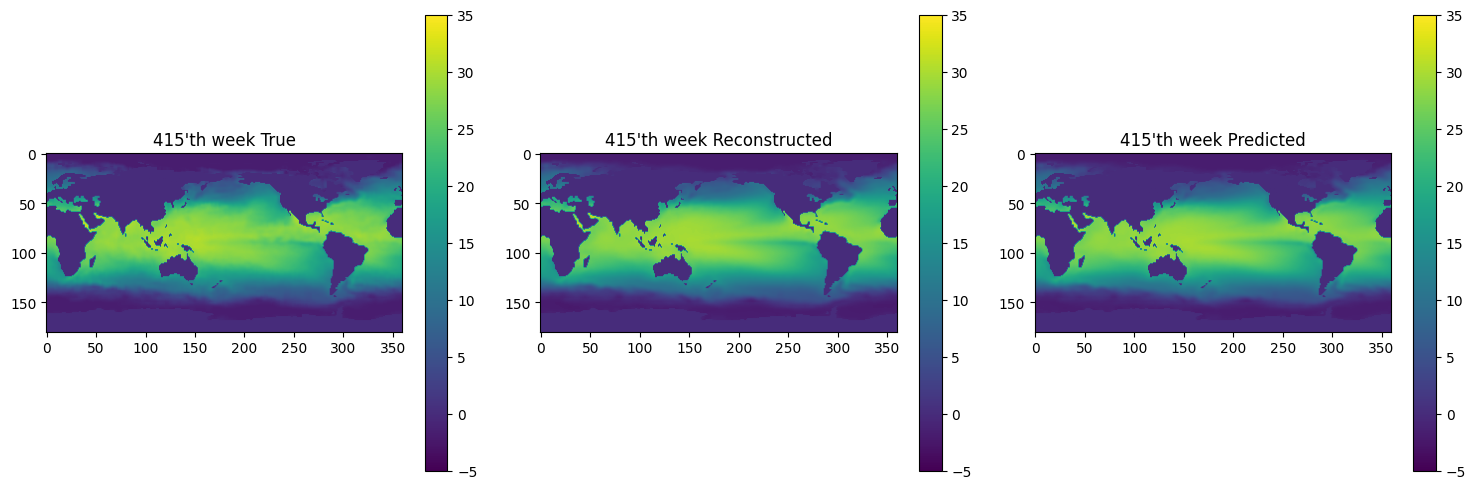

In [30]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
im1 = axs[0].imshow(train_data[dl_max+pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[0].set_title("{}'th week True".format(dl_max+pl_max-1))
fig.colorbar(im1, ax=axs[0], orientation='vertical')


# Plot the second subplot
im2 = axs[1].imshow(recon_data[0] * new_mask[0], vmin=-5, vmax=35)
axs[1].set_title("{}'th week Reconstructed".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Plot the third subplot
im3 = axs[2].imshow(pred_data[pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[2].set_title("{}'th week Predicted".format(dl_max+pl_max-1))
fig.colorbar(im3, ax=axs[2], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

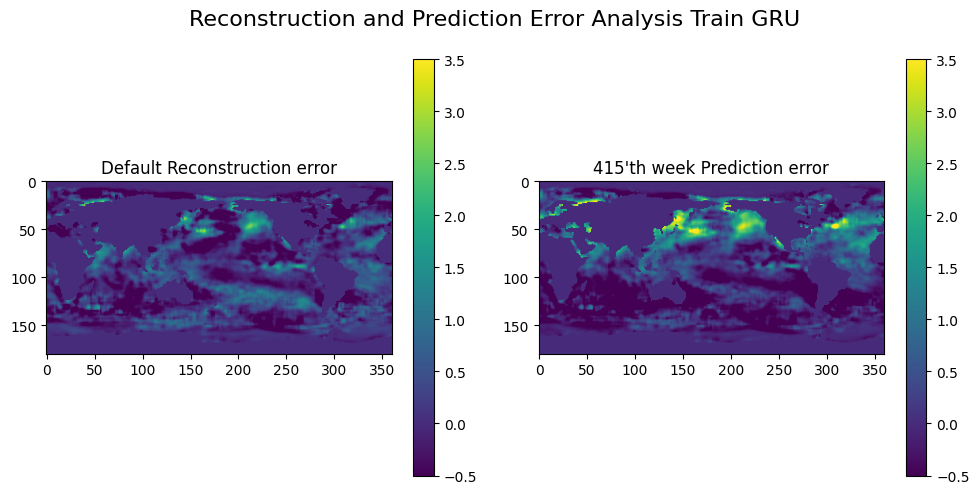

In [31]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow((train_data[dl_max+pl_max-1] - recon_data[0]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[0].set_title("Default Reconstruction error")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Plot the second subplot
im2 = axs[1].imshow((train_data[dl_max+pl_max-1] - pred_data[pl_max-1]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[1].set_title("{}'th week Prediction error".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

fig.suptitle('Reconstruction and Prediction Error Analysis Train GRU', fontsize=16)

# Adjust layout
plt.tight_layout()

# Adjust layout to make room for the figure title
plt.subplots_adjust(top=0.88)  # Adjust the top to make room for suptitle

In [32]:
temp_true = train_data[dl_max:dl_max+pl_max]
rmse_pred = np.sqrt(np.mean((temp_true-pred_data)**2))
print(rmse_pred)

0.51108354


## For East Pacific Region

In [33]:
temp_true_ep = train_data[dl_max:dl_max+pl_max,80:100,200:250]
temp_pred_ep = pred_data[:,80:100,200:250]
rmse_pred = np.sqrt(np.mean((temp_true_ep-temp_pred_ep)**2))
print(rmse_pred)

0.6785383


## For test data

In [34]:
test_ic = [116,40,66] #taken from randomly generated test indices from the data_analysis.ipynb file
pl_max = 300
dl_max = test_ic[0]
recon_data_ml = np.matmul(modes_test,data_test[test_ic[0]+pl_max-1].T).T
recon_data_ml = recon_data_ml + test_data_mean[None,]
recon_data = np.copy(test_data[test_ic[0]+pl_max-1])
recon_data = recon_data.reshape(1,180*360)
recon_data[0,mask] = recon_data_ml
recon_data = recon_data.reshape(1,180,360)

pred_data_ml = np.matmul(modes_test,mean_test_predictions.T).T
pred_data_ml = pred_data_ml + test_data_mean[None,]
pred_data = np.copy(test_data[test_ic[0]:test_ic[0]+pl_max])
pred_data = pred_data.reshape(pl_max,180*360)
pred_data[:,mask] = pred_data_ml
pred_data = pred_data.reshape(pl_max,180,360)
new_mask = np.load('Data/mask',allow_pickle=True)
#check if correctly done

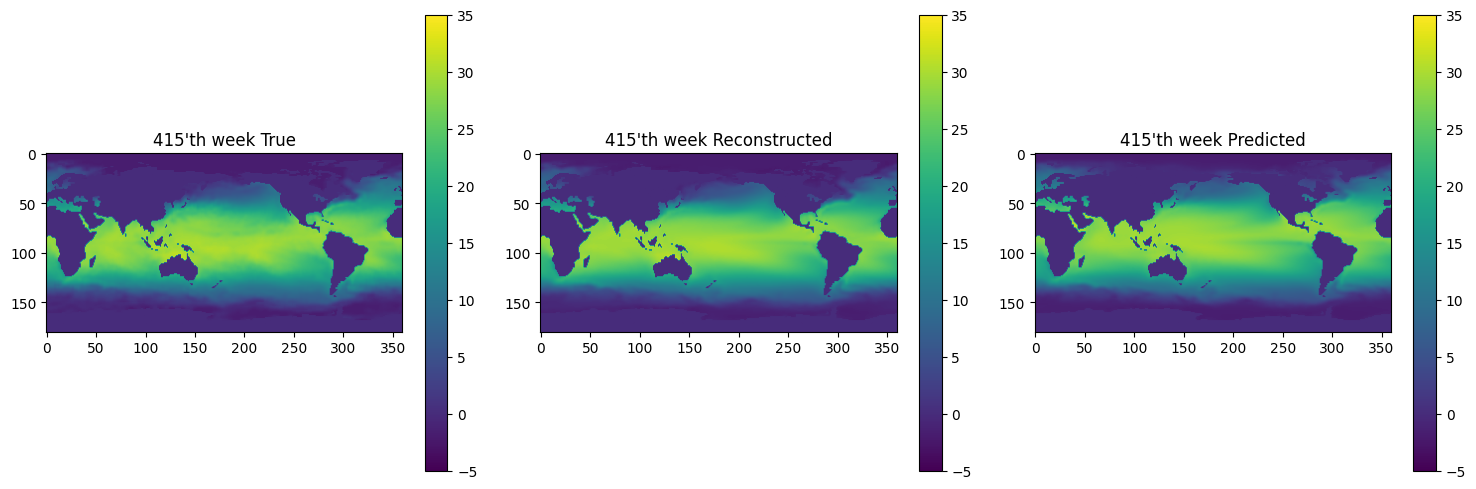

In [35]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first subplot
im1 = axs[0].imshow(test_data[dl_max+pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[0].set_title("{}'th week True".format(dl_max+pl_max-1))
fig.colorbar(im1, ax=axs[0], orientation='vertical')


# Plot the second subplot
im2 = axs[1].imshow(recon_data[0] * new_mask[0], vmin=-5, vmax=35)
axs[1].set_title("{}'th week Reconstructed".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

# Plot the third subplot
im3 = axs[2].imshow(pred_data[pl_max-1] * new_mask[0], vmin=-5, vmax=35)
axs[2].set_title("{}'th week Predicted".format(dl_max+pl_max-1))
fig.colorbar(im3, ax=axs[2], orientation='vertical')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

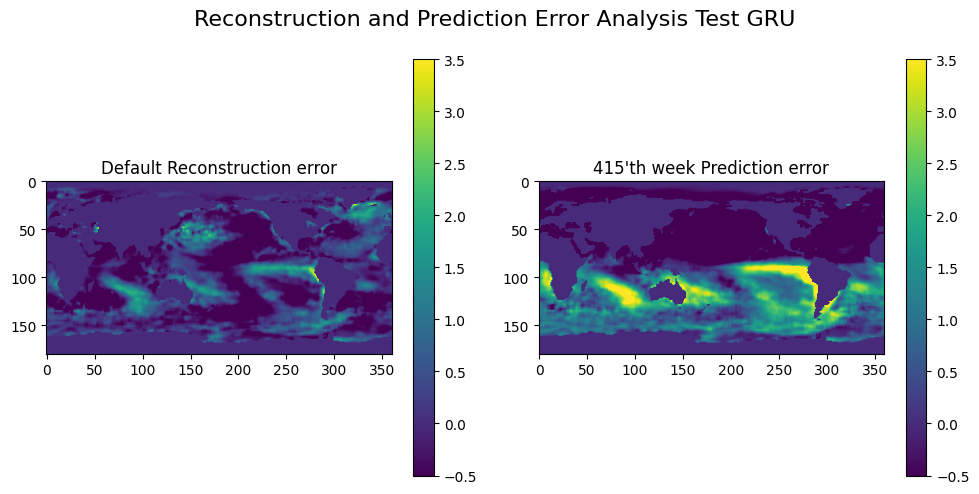

In [36]:
# Create a single figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0].imshow((test_data[dl_max+pl_max-1] - recon_data[0]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[0].set_title("Default Reconstruction error")
fig.colorbar(im1, ax=axs[0], orientation='vertical')

# Plot the second subplot
im2 = axs[1].imshow((test_data[dl_max+pl_max-1] - pred_data[pl_max-1]) * new_mask[0], vmin=-0.5, vmax=3.5)
axs[1].set_title("{}'th week Prediction error".format(dl_max+pl_max-1))
fig.colorbar(im2, ax=axs[1], orientation='vertical')

fig.suptitle('Reconstruction and Prediction Error Analysis Test GRU', fontsize=16)

# Adjust layout
plt.tight_layout()

# Adjust layout to make room for the figure title
plt.subplots_adjust(top=0.88)  # Adjust the top to make room for suptitle

In [37]:
temp_true = test_data[dl_max:dl_max+pl_max]
rmse_pred = np.sqrt(np.mean((temp_true-pred_data)**2))
print(rmse_pred)

1.3740172


## For East Pacific Region

In [38]:
temp_true_ep = test_data[dl_max:dl_max+pl_max,80:100,200:250]
temp_pred_ep = pred_data[:,80:100,200:250]
rmse_pred = np.sqrt(np.mean((temp_true_ep-temp_pred_ep)**2))
print(rmse_pred)

1.4664466


## Memory and computation time analysis

In [39]:
models = []
samples = []
size_values = [80,120,250,500,1000,2000]
layer_values = [1,2]
hspl_values = [50,60,70]
sl_values = [16,20]
for size in size_values:
    for layers in layer_values:
        for hspl in hspl_values:
            for sl in sl_values:
                string1 = f"RNN-gru-RDIM_5-N_used_427-NLAY_{layers}-SLAY_{size}-ISH_statefull-SL_{sl}-PL_{sl}-LR_0.001-DKP_1.0-ZKP_1.0-HSPL_{hspl}-IPL_300-NL_0-NICS_3"
                string2 = f"GRU-{size}-({layers})-HSPL-{hspl}-SL-{sl}"
                models.append([os.path.join(model_path,string1),string2])
                samples.append(string2)
title = "Sea Surface Temperatures"

In [40]:
train_time_dict = dict()
memory_dict = dict()
trainable_parameters_dict = dict()
for i in range(len(models)):
    rfolder, label = models[i][0], models[i][1]
    fname = os.path.join(rfolder, 'data.pickle')
    if os.path.isfile(fname):
        with open(fname, 'rb') as rfile:
            try:
                rs = pickle.load(rfile)
            except:
                continue
            #print(rs.keys())
            train_time_dict[label]=rs["total_training_time"]
            trainable_parameters_dict[label]=rs["n_trainable_parameters"]
            memory_dict[label]=rs["memory"]
    else:
        print('Not found {}'.format(fname))

In [41]:
train_time_dict

{'GRU-80-(1)-HSPL-50-SL-16': 36.95212459564209,
 'GRU-80-(1)-HSPL-50-SL-20': 72.77460312843323,
 'GRU-80-(1)-HSPL-60-SL-16': 6.9079670906066895,
 'GRU-80-(1)-HSPL-60-SL-20': 82.12871766090393,
 'GRU-80-(1)-HSPL-70-SL-16': 48.27103018760681,
 'GRU-80-(1)-HSPL-70-SL-20': 88.97629594802856,
 'GRU-80-(2)-HSPL-50-SL-16': 66.340580701828,
 'GRU-80-(2)-HSPL-50-SL-20': 100.83615636825562,
 'GRU-80-(2)-HSPL-60-SL-16': 52.89619970321655,
 'GRU-80-(2)-HSPL-60-SL-20': 4.711225509643555,
 'GRU-80-(2)-HSPL-70-SL-16': 63.104923248291016,
 'GRU-80-(2)-HSPL-70-SL-20': 144.93856620788574,
 'GRU-120-(1)-HSPL-50-SL-16': 33.46921420097351,
 'GRU-120-(1)-HSPL-50-SL-20': 60.15217065811157,
 'GRU-120-(1)-HSPL-60-SL-16': 41.85993480682373,
 'GRU-120-(1)-HSPL-60-SL-20': 102.75694251060486,
 'GRU-120-(1)-HSPL-70-SL-16': 43.109214544296265,
 'GRU-120-(1)-HSPL-70-SL-20': 90.77169179916382,
 'GRU-120-(2)-HSPL-50-SL-16': 62.21637201309204,
 'GRU-120-(2)-HSPL-50-SL-20': 245.79814291000366,
 'GRU-120-(2)-HSPL-60-SL-16

In [42]:
values = train_time_dict.values()
total = sum(values)
average = total / len(values)
print(average)

788.3558741874165


In [43]:
memory_dict

{'GRU-80-(1)-HSPL-50-SL-16': 438.74609375,
 'GRU-80-(1)-HSPL-50-SL-20': 438.6484375,
 'GRU-80-(1)-HSPL-60-SL-16': 342.578125,
 'GRU-80-(1)-HSPL-60-SL-20': 438.4375,
 'GRU-80-(1)-HSPL-70-SL-16': 438.515625,
 'GRU-80-(1)-HSPL-70-SL-20': 438.1640625,
 'GRU-80-(2)-HSPL-50-SL-16': 525.0234375,
 'GRU-80-(2)-HSPL-50-SL-20': 525.75,
 'GRU-80-(2)-HSPL-60-SL-16': 525.07421875,
 'GRU-80-(2)-HSPL-60-SL-20': 365.609375,
 'GRU-80-(2)-HSPL-70-SL-16': 525.65234375,
 'GRU-80-(2)-HSPL-70-SL-20': 525.21484375,
 'GRU-120-(1)-HSPL-50-SL-16': 438.125,
 'GRU-120-(1)-HSPL-50-SL-20': 443.77734375,
 'GRU-120-(1)-HSPL-60-SL-16': 441.4296875,
 'GRU-120-(1)-HSPL-60-SL-20': 442.703125,
 'GRU-120-(1)-HSPL-70-SL-16': 444.21484375,
 'GRU-120-(1)-HSPL-70-SL-20': 442.97265625,
 'GRU-120-(2)-HSPL-50-SL-16': 528.2421875,
 'GRU-120-(2)-HSPL-50-SL-20': 531.44140625,
 'GRU-120-(2)-HSPL-60-SL-16': 538.65625,
 'GRU-120-(2)-HSPL-60-SL-20': 538.4609375,
 'GRU-120-(2)-HSPL-70-SL-16': 539.10546875,
 'GRU-120-(2)-HSPL-70-SL-20': 52

In [44]:
values = memory_dict.values()
total = sum(values)
average = total / len(values)
print(average)

989.8629557291666


In [45]:
trainable_parameters_dict

{'GRU-80-(1)-HSPL-50-SL-16': 21045,
 'GRU-80-(1)-HSPL-50-SL-20': 21045,
 'GRU-80-(1)-HSPL-60-SL-16': 21045,
 'GRU-80-(1)-HSPL-60-SL-20': 21045,
 'GRU-80-(1)-HSPL-70-SL-16': 21045,
 'GRU-80-(1)-HSPL-70-SL-20': 21045,
 'GRU-80-(2)-HSPL-50-SL-16': 59685,
 'GRU-80-(2)-HSPL-50-SL-20': 59685,
 'GRU-80-(2)-HSPL-60-SL-16': 59685,
 'GRU-80-(2)-HSPL-60-SL-20': 59685,
 'GRU-80-(2)-HSPL-70-SL-16': 59685,
 'GRU-80-(2)-HSPL-70-SL-20': 59685,
 'GRU-120-(1)-HSPL-50-SL-16': 45965,
 'GRU-120-(1)-HSPL-50-SL-20': 45965,
 'GRU-120-(1)-HSPL-60-SL-16': 45965,
 'GRU-120-(1)-HSPL-60-SL-20': 45965,
 'GRU-120-(1)-HSPL-70-SL-16': 45965,
 'GRU-120-(1)-HSPL-70-SL-20': 45965,
 'GRU-120-(2)-HSPL-50-SL-16': 132725,
 'GRU-120-(2)-HSPL-50-SL-20': 132725,
 'GRU-120-(2)-HSPL-60-SL-16': 132725,
 'GRU-120-(2)-HSPL-60-SL-20': 132725,
 'GRU-120-(2)-HSPL-70-SL-16': 132725,
 'GRU-120-(2)-HSPL-70-SL-20': 132725,
 'GRU-250-(1)-HSPL-50-SL-16': 193255,
 'GRU-250-(1)-HSPL-50-SL-20': 193255,
 'GRU-250-(1)-HSPL-60-SL-16': 193255,
 'GR